In [1]:
#Important packages to be imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, r2_score,mean_absolute_error, mean_squared_error
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
#Renewable energy value loading
solar_data=pd.read_csv("Solar_Footprints_in_California.csv")

In [56]:
#Dataset information
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OBJECTID                       5397 non-null   int64  
 1   COUNTYNAME                     5397 non-null   object 
 2   Acres                          5397 non-null   float64
 3   Type                           5397 non-null   object 
 4   Urban_Rural                    5397 non-null   object 
 5   Combined_Class                 5397 non-null   object 
 6   Dist_Sub_GTET_100_Miles        5397 non-null   float64
 7   Precentile_GTET_100_Miles      5397 non-null   object 
 8   Name_Sub_GTET_100              5397 non-null   object 
 9   HIFLD_ID_Sub_GTET_100          5255 non-null   float64
 10  Dist_Sub_GTET_200_Miles        5397 non-null   float64
 11  Precentile_GTET_200_Miles      5397 non-null   object 
 12  Name_Sub_GTET_200              5397 non-null   o

In [74]:
#Replace the null values in the dataset with a 0
solar_data=solar_data.fillna(0)

In [58]:
#Check Null values in the dataset
solar_data.isnull().sum() #sum() counts the number of True Values

OBJECTID                         0
COUNTYNAME                       0
Acres                            0
Type                             0
Urban_Rural                      0
Combined_Class                   0
Dist_Sub_GTET_100_Miles          0
Precentile_GTET_100_Miles        0
Name_Sub_GTET_100                0
HIFLD_ID_Sub_GTET_100            0
Dist_Sub_GTET_200_Miles          0
Precentile_GTET_200_Miles        0
Name_Sub_GTET_200                0
HIFLD_ID_Sub_GTET_200            0
Dist_Sub_CAISO_Miles             0
Precentile_GTET_CAISO_Miles      0
Name_Sub_CASIO                   0
HIFLD_ID_Sub_CAISO               0
Solar_Technoeconomic_Intersec    0
Shape__Area                      0
Shape__Length                    0
dtype: int64

In [59]:
#Dataset initial rows
solar_data.head()

,OBJECTID,COUNTYNAME,Acres,Type,Urban_Rural,Combined_Class,Dist_Sub_GTET_100_Miles,Precentile_GTET_100_Miles,Name_Sub_GTET_100,HIFLD_ID_Sub_GTET_100,...,Precentile_GTET_200_Miles,Name_Sub_GTET_200,HIFLD_ID_Sub_GTET_200,Dist_Sub_CAISO_Miles,Precentile_GTET_CAISO_Miles,Name_Sub_CASIO,HIFLD_ID_Sub_CAISO,Solar_Technoeconomic_Intersec,Shape__Area,Shape__Length
0,1,Alameda County,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.272283,0 to 25th,Los Esteros,310258.0,Within,6768.954679,365.801336
1,2,Alameda County,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.392816,0 to 25th,Los Esteros,310258.0,Within,7677.228982,366.909878
2,3,Alameda County,1.275783,Rooftop,Urban,Rooftop - Urban,0.426104,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.537298,0 to 25th,Los Esteros,310258.0,Within,5162.935990,290.576263
3,4,Alameda County,1.424286,Rooftop,Urban,Rooftop - Urban,0.491306,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.626699,0 to 25th,Los Esteros,310258.0,Within,5763.905754,344.705846
4,5,Alameda County,0.984429,Rooftop,Urban,Rooftop - Urban,0.795822,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.728629,25th to 50th,Los Esteros,310258.0,Within,3983.859693,283.968425


In [4]:
#Transform the dependent variable into numeric format
cond=[
    solar_data['Type']=="Rooftop",
    solar_data['Type']=="Ground",
    solar_data['Type']=="Parking"

]
val=[0,1,2]
solar_data['Type_Num']=np.select(cond,val)

In [5]:
# Forming the independent variable dataset and dependent variable dataset
feature = solar_data.drop(['Type','Type_Num','OBJECTID','Name_Sub_GTET_100','Name_Sub_GTET_200','Name_Sub_CASIO','Combined_Class'],axis=1)
target = solar_data.loc[:,'Type_Num']

In [6]:
#Dummy variables creation to prepare the data for ML models
COUNTYNAME=pd.get_dummies(feature['COUNTYNAME'],drop_first=True)
Urban_Rural=pd.get_dummies(feature['Urban_Rural'],drop_first=True)
Precentile_GTET_100_Miles=pd.get_dummies(feature['Precentile_GTET_100_Miles'],drop_first=True)
Precentile_GTET_200_Miles=pd.get_dummies(feature['Precentile_GTET_200_Miles'],drop_first=True)
Precentile_GTET_CAISO_Miles=pd.get_dummies(feature['Precentile_GTET_CAISO_Miles'],drop_first=True)
Solar_Technoeconomic_Intersec=pd.get_dummies(feature['Solar_Technoeconomic_Intersec'],drop_first=True)

In [7]:
#Having required variables for independent dataset
feature.drop(['COUNTYNAME','Urban_Rural','Precentile_GTET_100_Miles','Precentile_GTET_200_Miles','Precentile_GTET_CAISO_Miles','Solar_Technoeconomic_Intersec'],axis=1,inplace=True)

In [8]:
#Independent variable dataset creation
feature = pd.concat([feature,COUNTYNAME,Urban_Rural,Precentile_GTET_100_Miles,Precentile_GTET_200_Miles,Precentile_GTET_CAISO_Miles,Solar_Technoeconomic_Intersec],axis=1)

In [ ]:
#Dividing the actual dataset into 2 parts : Train data and test data
X_train,X_test,Y_train,Y_test = train_test_split(feature, target ,test_size=0.20,random_st#Independent variable dataset creation
feature = pd.concat([feature,COUNTYNAME,Urban_Rural,Precentile_GTET_100_Miles,Precentile_GTET_200_Miles,Precentile_GTET_CAISO_Miles,Solar_Technoeconomic_Intersec],axis=1)ate=30)

EDA

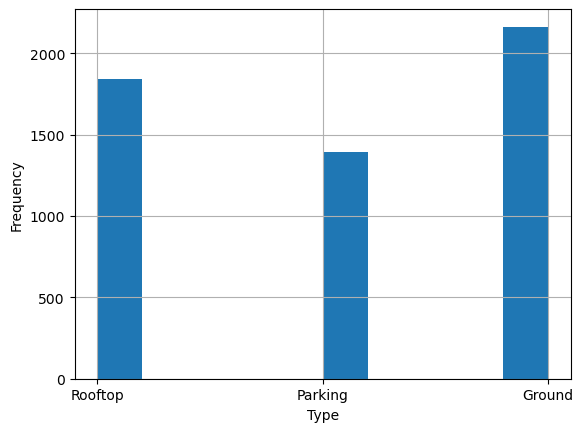

In [78]:
#Distribution of Type variable 
solar_data['Type'].hist()
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='Type', ylabel='Shape__Area'>

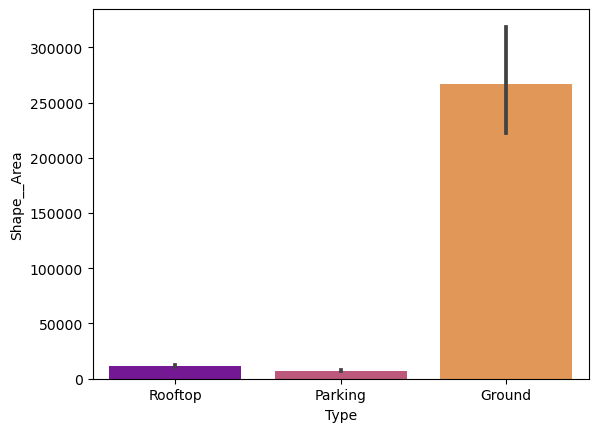

In [65]:
# relationship between shape area and solar panel type
sns.barplot(x='Type', y='Shape__Area', data=solar_data,palette='plasma')

<AxesSubplot:xlabel='Type', ylabel='Shape__Length'>

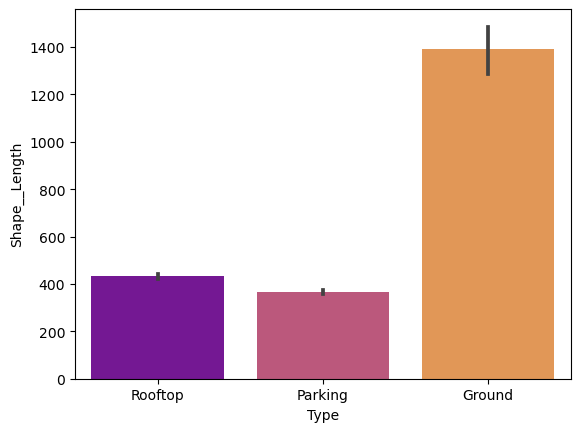

In [66]:
#relationship between shape length  and solar panel type
sns.barplot(x='Type', y='Shape__Length', data=solar_data,palette='plasma')

<AxesSubplot:xlabel='Urban_Rural', ylabel='Shape__Area'>

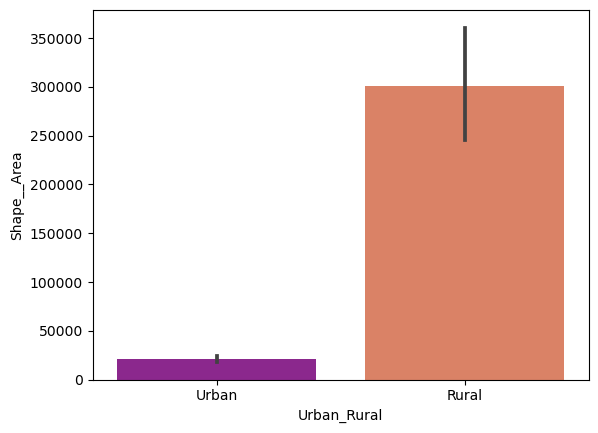

In [67]:
# relationship between shape area and urban/rural
sns.barplot(x='Urban_Rural', y='Shape__Area', data=solar_data,palette='plasma')

<AxesSubplot:xlabel='Urban_Rural', ylabel='Shape__Length'>

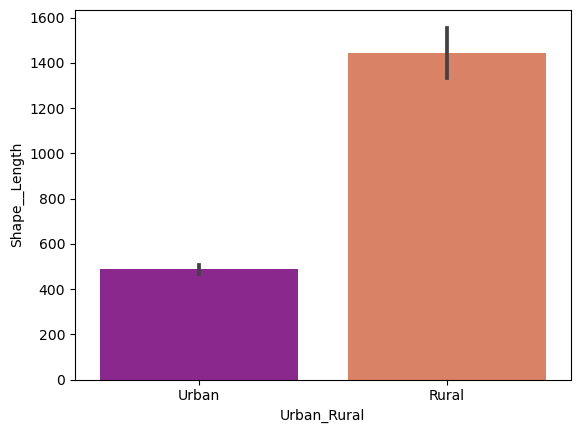

In [68]:
# relationship between shape length and solar panel type
sns.barplot(x='Urban_Rural', y='Shape__Length', data=solar_data,palette='plasma')

In [73]:
#Decision Tree ML architecture
import warnings
with warnings.catch_warnings(record=True):
    model1_dt = DecisionTreeClassifier(random_state=8)
    model1_dt.fit(X_train, Y_train)
    Y_pred1 = model1_dt.predict(X_test)
    print('Decision Tree architecture r squared score:',r2_score(Y_test, Y_pred1))
    print('Decision Tree architecture MAE:', mean_absolute_error(Y_test, Y_pred1))
    print('Decision Tree architecture RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred1)))
    print('Decision Tree architecture Classification Report:\n',classification_report(Y_test, Y_pred1))


Decision Tree architecture r squared score: -0.6156032849020845
Decision Tree architecture MAE: 0.5527777777777778
Decision Tree architecture RMSE: 0.9732534213770955
Decision Tree architecture Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59       376
           1       0.80      0.81      0.81       436
           2       0.46      0.46      0.46       268

    accuracy                           0.64      1080
   macro avg       0.62      0.62      0.62      1080
weighted avg       0.64      0.64      0.64      1080



In [39]:
#Random Forest ML architecture
import warnings
with warnings.catch_warnings(record=True):
    model2_rf = RandomForestClassifier(random_state=8)
    model2_rf.fit(X_train, Y_train)
    Y_pred2 = model2_rf.predict(X_test)
    print('Random Forest architecture r squared score:',r2_score(Y_test, Y_pred2))
    print('Random Forest architecture MAE:', mean_absolute_error(Y_test, Y_pred2))
    print('Random Forest architecture RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred2)))
    print('Random Forest architecture Classification Report:\n',classification_report(Y_test, Y_pred2))

Random Forest architecture r squared score: -0.2539481996209727
Random Forest architecture MAE: 0.4148148148148148
Random Forest architecture RMSE: 0.8574294053653544
Random Forest architecture Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.74      0.71       376
           1       0.89      0.87      0.88       436
           2       0.61      0.54      0.58       268

    accuracy                           0.75      1080
   macro avg       0.73      0.72      0.72      1080
weighted avg       0.75      0.75      0.74      1080



In [40]:
#Logistic Regression ML architecture
import warnings
with warnings.catch_warnings(record=True):
    model3_lr = LogisticRegression()
    model3_lr.fit(X_train, Y_train)
    Y_pred3 = model3_lr.predict(X_test)
    print('Logistic Regression architecture r squared score:',r2_score(Y_test, Y_pred3))
    print('Logistic Regression architecture MAE:', mean_absolute_error(Y_test, Y_pred3))
    print('Logistic Regression architecture RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred3)))
    print('Logistic Regression architecture Classification Report:\n',classification_report(Y_test, Y_pred3))

Logistic Regression architecture r squared score: -1.0514845230574856
Logistic Regression architecture MAE: 0.7287037037037037
Logistic Regression architecture RMSE: 1.09671225842414
Logistic Regression architecture Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.59      0.50       376
           1       0.80      0.49      0.61       436
           2       0.36      0.43      0.39       268

    accuracy                           0.51      1080
   macro avg       0.54      0.50      0.50      1080
weighted avg       0.57      0.51      0.52      1080



In [41]:
#Gaussian Naive Bayes ML architecture
import warnings
with warnings.catch_warnings(record=True):
    model4_gb = GaussianNB()
    model4_gb.fit(X_train, Y_train)
    Y_pred4 = model4_gb.predict(X_test)
    print('Gaussian Naive Bayes ML architecture r squared score:',r2_score(Y_test, Y_pred4))
    print('Gaussian Naive Bayes ML architecture MAE:', mean_absolute_error(Y_test, Y_pred4))
    print('Gaussian Naive Bayes ML architecture RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred4)))
    print('Gaussian Naive Bayes ML architecture Classification Report:\n',classification_report(Y_test, Y_pred4))

Gaussian Naive Bayes ML architecture r squared score: -1.702147820593809
Gaussian Naive Bayes ML architecture MAE: 0.937962962962963
Gaussian Naive Bayes ML architecture RMSE: 1.2586736110919539
Gaussian Naive Bayes ML architecture Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.17      0.22       376
           1       0.94      0.30      0.45       436
           2       0.31      0.83      0.45       268

    accuracy                           0.39      1080
   macro avg       0.51      0.43      0.37      1080
weighted avg       0.56      0.39      0.37      1080



In [42]:
#K Nearest Neighbour ML architecture
import warnings
with warnings.catch_warnings(record=True):
    model5_knn = KNeighborsClassifier(n_neighbors=3,metric = 'euclidean')
    model5_knn.fit(X_train, Y_train)
    Y_pred5 = model5_knn.predict(X_test)
    print('K Nearest Neighbour ML architecture r squared score:',r2_score(Y_test, Y_pred5))
    print('K Nearest Neighbour ML architecture MAE:', mean_absolute_error(Y_test, Y_pred5))
    print('K Nearest Neighbour ML architecture RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred5)))
    print('K Nearest Neighbour ML architecture Classification Report:\n',classification_report(Y_test, Y_pred5))

K Nearest Neighbour ML architecture r squared score: -0.5808591282375235
K Nearest Neighbour ML architecture MAE: 0.5805555555555556
K Nearest Neighbour ML architecture RMSE: 0.9627314536524979
K Nearest Neighbour ML architecture Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.64      0.58       376
           1       0.73      0.67      0.70       436
           2       0.48      0.40      0.44       268

    accuracy                           0.59      1080
   macro avg       0.58      0.57      0.57      1080
weighted avg       0.60      0.59      0.59      1080

